# Introduction:

**What is breast cancer?**

Breast cancer is one of the most common types of cancer diagnosed among women worldwide .
It occurs when abnormal cells in the breast begin to grow and divide in an uncontrolled way and eventually form a growth (tumour).

Breast cancer most commonly starts in the cells that line the milk ducts of the breast. It mainly affects women, but men can get it too.



---



 **Importance of Early Detection**

 Detecting breast cancer early improves survival, lowers
morbidity and reduces the cost of care, if patients can be
promptly diagnosed and effectively treated

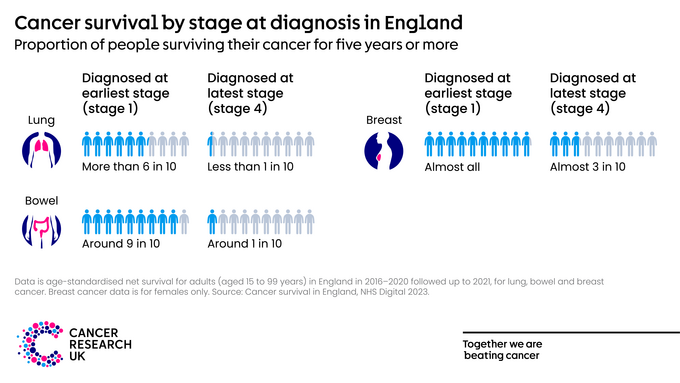



---



**KNN Algorithm**

The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful, classification technique used in machine learning. It works by classifying data points based on the majority class of their nearest neighbors. In the context of breast cancer detection, KNN can be used to classify breast tissue samples as either malignant (cancerous) or benign (non-cancerous) based on their features

# Dataset


The dataset used in this project is the Wisconsin Breast Cancer Dataset . It contains various features that describe the characteristics of cell nuclei present in breast cancer biopsies, including radius, texture, smoothness, and compactness.

**Features of the Dataset**

* **mean_radius**: The mean of distances from the center to points on the perimeter.

* **mean_texture**: The mean of the standard deviation of gray-scale values.

* **mean_smoothness**: The mean of local variation in the cell texture.

And several other statistical features based on cell shape and texture.

# Methodology


**K-Nearest Neighbors algorithm**

KNN is a non-parametric classification algorithm. The basic idea is that it classifies a data point by majority voting among its k nearest neighbors. The distance metric typically used in KNN is the Euclidean distance, which measures the straight-line distance between two points in the feature space.



---



**Choosing the K Value**

The performance of KNN depends on the choice of k, the number of neighbors to consider. Typically, you choose an odd number to avoid ties in voting. A good practice is to use cross-validation or the elbow method to determine the optimal value for k


# Model Implementation in R


**Loading Libraries**

We’ll use the class package for KNN, the caret package for model evaluation, and dolyr for data manipulation.

In [ ]:
#loading necessary libraries
library(class)
library(dplyr)
library(caret)



---



**Loading the Dataset**

In [ ]:
#Loading dataset
data <- read.csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
#Ispecting the first rows
head(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst,X
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
6,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA




---



**Data Preprocessing**

The dataset needs to be cleaned and normalized. We will convert the diagnosis column into a factor and scale the numerical features

In [ ]:
#Removing empty column
data <- data %>% select(-X)
# Removing the ID column
data <- data[, -1]
# Encoding the target variable as a factor
data$diagnosis <- factor(data$diagnosis, levels = c("B", "M"), labels = c("Benign", "Malignant"))
# Spliting the data into training and testing sets
set.seed(42)  # For reproducibility
train_index <- createDataPartition(data$diagnosis, p = 0.8, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]
# Separating features and target variable
train_features <- train_data[, -1]
test_features <- test_data[, -1]
train_labels <- train_data$diagnosis
test_labels <- test_data$diagnosis
# Normalizing/Standardizing the features
preprocess_params <- preProcess(train_features, method = c("center", "scale"))
train_features <- predict(preprocess_params, train_features)
test_features <- predict(preprocess_params, test_features)



---



**Demonstrating Overfitting and Underfitting**

The value of k in the KNN algorithm is related to the error rate of the model. A small value of k could lead to overfitting (”The smaller the K the tighter the fit”) as well as a big value of k can lead to underfitting.

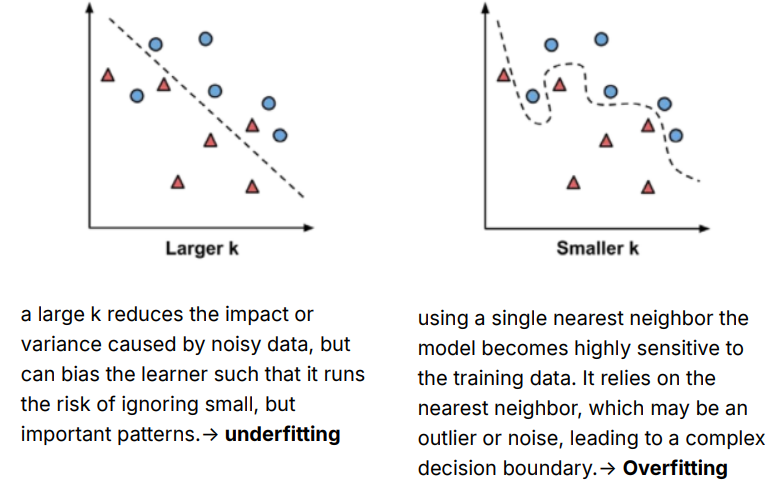

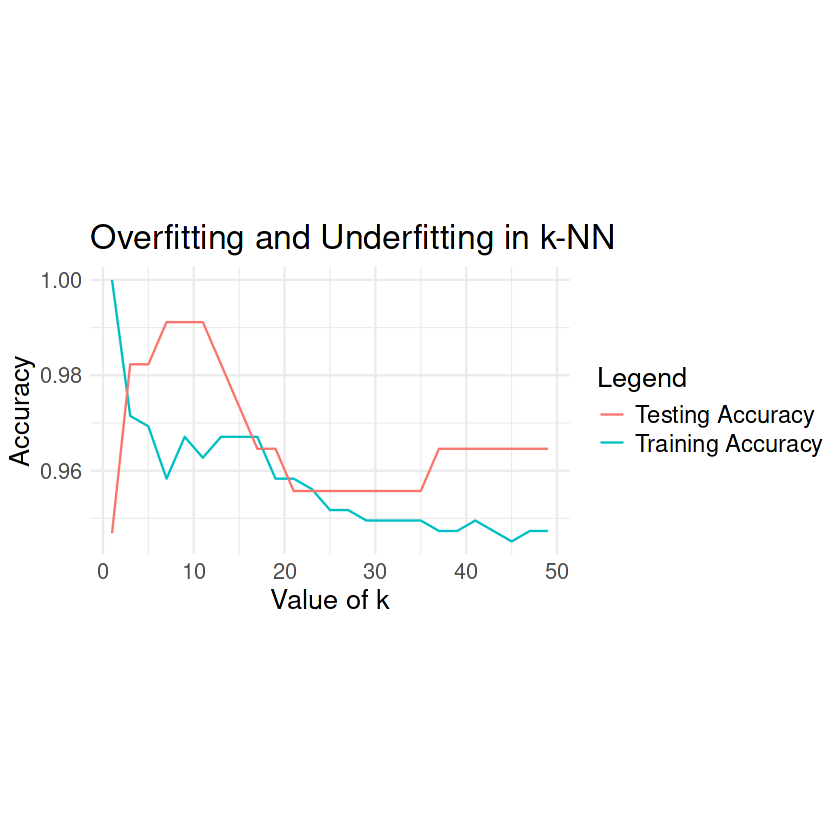

In [ ]:
# Defining a range of k values
k_values <- seq(1, 50, by = 2)

# Initializing vectors to store accuracy
train_accuracy <- numeric(length(k_values))
test_accuracy <- numeric(length(k_values))

# Looping through k values and evaluate model performance
for (i in seq_along(k_values)) {
  k <- k_values[i]

  # Training the k-NN model
  knn_train_predictions <- knn(train = train_features, test = train_features, cl = train_labels, k = k)
  knn_test_predictions <- knn(train = train_features, test = test_features, cl = train_labels, k = k)

  # Calculating accuracy on training and testing sets
  train_accuracy[i] <- sum(knn_train_predictions == train_labels) / length(train_labels)
  test_accuracy[i] <- sum(knn_test_predictions == test_labels) / length(test_labels)
}

# Ploting the results
results <- data.frame(k = k_values, Train_Accuracy = train_accuracy, Test_Accuracy = test_accuracy)
ggplot(results, aes(x = k)) +
  geom_line(aes(y = Train_Accuracy, color = "Training Accuracy")) +
  geom_line(aes(y = Test_Accuracy, color = "Testing Accuracy")) +
  labs(title = "Overfitting and Underfitting in k-NN",
       x = "Value of k",
       y = "Accuracy",
       color = "Legend") +
  theme_minimal()+
  theme(text = element_text(size = 16),  # Increase font size
        plot.title = element_text(size = 20),
        legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
        aspect.ratio = 0.6)

From the graph we can conclude that a small K performs well with the training data but doesn't perform well with testing data.Whereas, a big K doesn't perform well with both testing and training data



---





**Hyperparameter Tuning**

To avoid such problems we perform Hyperparameter Tuning that is the process of selecting the best set of hyperparameters for a machine learning model to improve its performance.

In [ ]:
# Hyperparameter Tuning with an if-else loop
# Initializing variables to store the best k and its accuracy
best_k <- k_values[1]
best_accuracy <- test_accuracy[1]

# Looping through k values to find the best k
for (i in seq_along(k_values)) {
  k <- k_values[i]
  current_accuracy <- test_accuracy[i]

  # Updating best k if current accuracy is better
  if (current_accuracy > best_accuracy) {
    best_k <- k
    best_accuracy <- current_accuracy
  }
}

# Printing the best k and its accuracy
print(paste("Best k:", best_k))
print(paste("Best Testing Accuracy:", best_accuracy))

[1] "Best k: 7"
[1] "Best Testing Accuracy: 0.991150442477876"




---



**Training the KNN Model**

In [ ]:
#Applying knn algorithm
knn_predictions <- knn(train = train_features, test = test_features, cl = train_labels, k = best_k)
#Evaluating the model
conf_matrix <- confusionMatrix(knn_predictions, test_labels)
print(conf_matrix)
# Accuracy
accuracy <- conf_matrix$overall["Accuracy"]
print(paste("Accuracy:", accuracy))

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign        70         0
  Malignant      1        42
                                          
               Accuracy : 0.9912          
                 95% CI : (0.9517, 0.9998)
    No Information Rate : 0.6283          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9811          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9859          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9767          
             Prevalence : 0.6283          
         Detection Rate : 0.6195          
   Detection Prevalence : 0.6195          
      Balanced Accuracy : 0.9930          
                                          
       'Positive' Class : Benign          

1. Accuracy: 99.12% ✅

* This means the model correctly predicted 99.12% of all cases.

* High accuracy indicates that KNN is highly reliable in detecting breast cancer.

2. Sensitivity (Recall for Benign Cases): 98.59% 🔍

* Out of all actual benign cases, the model correctly identified 98.59%.

* A slight drawback: The model misclassified one malignant case as benign, which is a false negative (could be risky in medical settings).

3. Specificity (Recall for Malignant Cases): 100% 🎯

* The model correctly identified all malignant cases (100%).

* This is crucial because no cancerous cases were missed, ensuring patient safety.

4. Precision (Positive Predictive Value for Benign Cases): 100% 🏆

* Every time the model predicted a case as benign, it was always correct (no false alarms).

* This means zero unnecessary concern for patients who are actually healthy.

5. Negative Predictive Value (NPV): 97.67% 📉

* When the model predicted malignant, it was correct 97.67% of the time.

* This means that only one case was misclassified as benign when it was actually cancerous.

6. Balanced Accuracy: 99.3% ⚖️

* Since the dataset might have unequal numbers of benign and malignant cases, balanced accuracy ensures fairness.

* 99.3% balanced accuracy confirms that the model performs consistently well across both classes.

7. Kappa Score: 0.9811 🏅

* Kappa measures how well the model performs compared to random guessing.

* A value close to 1 (0.98) means the model is almost perfect and far better than chance.